In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('datasets/diamonds.csv', index_col=0)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.shape

(53940, 10)

In [4]:
# the data set is too large. Let's work with just a fraction of it (20%)
data = data.sample(frac = 0.2)

data.shape

(10788, 10)

In [5]:
data.reset_index(inplace= True, drop= True) # so that the index starts at zero
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.34,Ideal,E,VVS2,62.3,57.0,1071,4.48,4.44,2.78
1,1.39,Premium,I,SI1,62.1,57.0,6694,7.22,7.08,4.44
2,1.20,Very Good,I,SI1,62.6,58.2,5280,6.71,6.74,4.21
3,0.56,Premium,G,SI2,60.0,60.0,1208,5.48,5.42,3.11
4,1.00,Premium,F,VS1,62.6,58.0,7114,6.37,6.40,4.00


In [6]:
# correlation matrix
correlation = data.corr()

correlation

C:\Users\SAM.KAMAU\AppData\Local\Temp\ipykernel_12504\1944657016.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = data.corr()


,carat,depth,table,price,x,y,z
carat,1.000000,0.039473,0.172829,0.922106,0.975446,0.895391,0.970397
depth,0.039473,1.000000,-0.297451,-0.007138,-0.015532,-0.024884,0.106841
table,0.172829,-0.297451,1.000000,0.123733,0.185447,0.162361,0.143728
price,0.922106,-0.007138,0.123733,1.000000,0.885516,0.814563,0.876916
x,0.975446,-0.015532,0.185447,0.885516,1.000000,0.915728,0.986764
y,0.895391,-0.024884,0.162361,0.814563,0.915728,1.000000,0.921370
z,0.970397,0.106841,0.143728,0.876916,0.986764,0.921370,1.000000


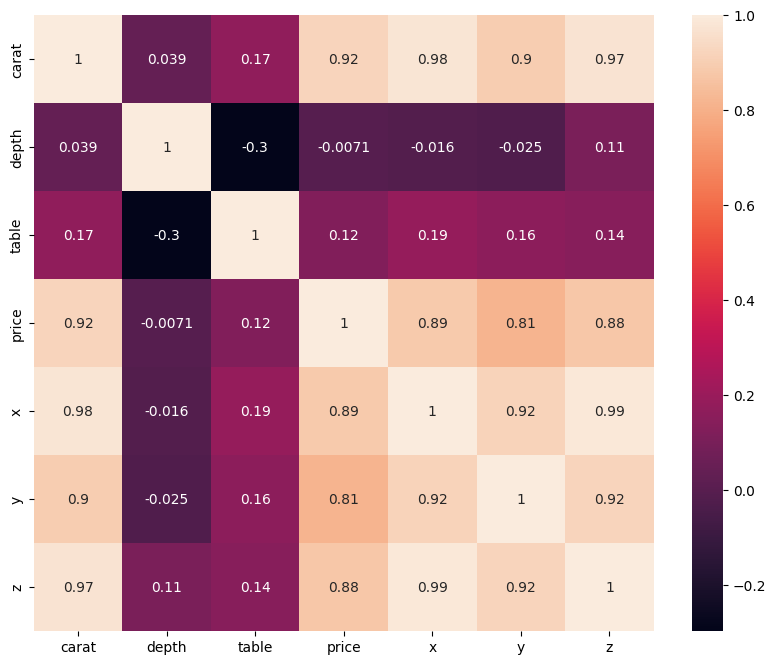

In [7]:
# using a heatmap to visualize the correlations
plt.subplots(figsize = (10,8))
sns.heatmap(correlation, annot= True)

plt.show()

In [8]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z'],
      dtype='object')

In [9]:
# exploring the categorical colummns in our data
data['cut'].unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

In [10]:
data['color'].unique()

array(['E', 'I', 'G', 'F', 'H', 'J', 'D'], dtype=object)

In [11]:
data['clarity'].unique()

array(['VVS2', 'SI1', 'SI2', 'VS1', 'VVS1', 'IF', 'VS2', 'I1'],
      dtype=object)

<Axes: title={'center': 'price'}, xlabel='cut'>

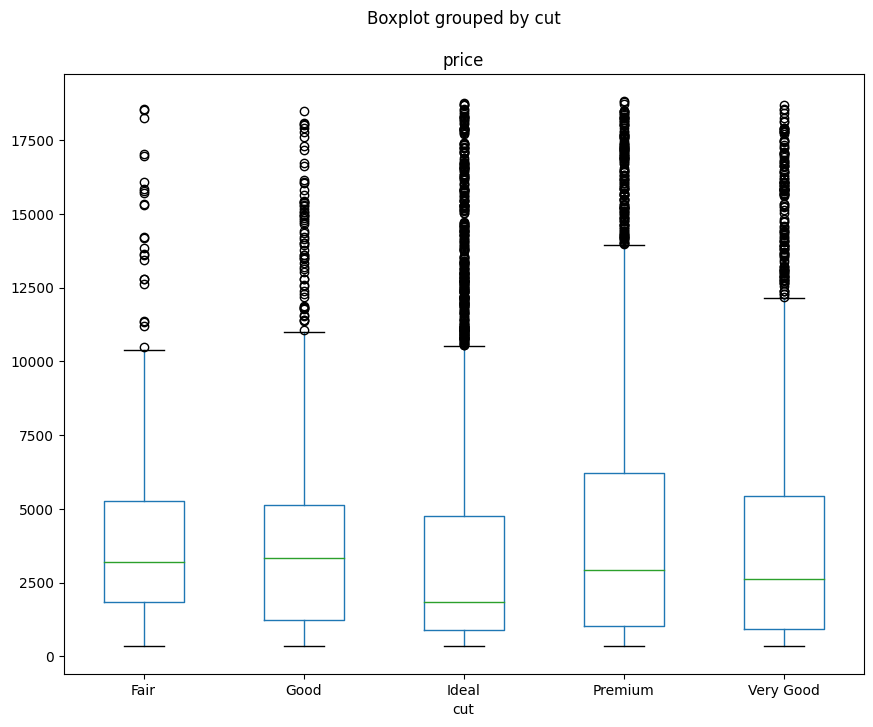

In [12]:
data.boxplot(by= 'cut', column=['price'], grid= False, figsize= (10,8))

<Axes: title={'center': 'price'}, xlabel='color'>

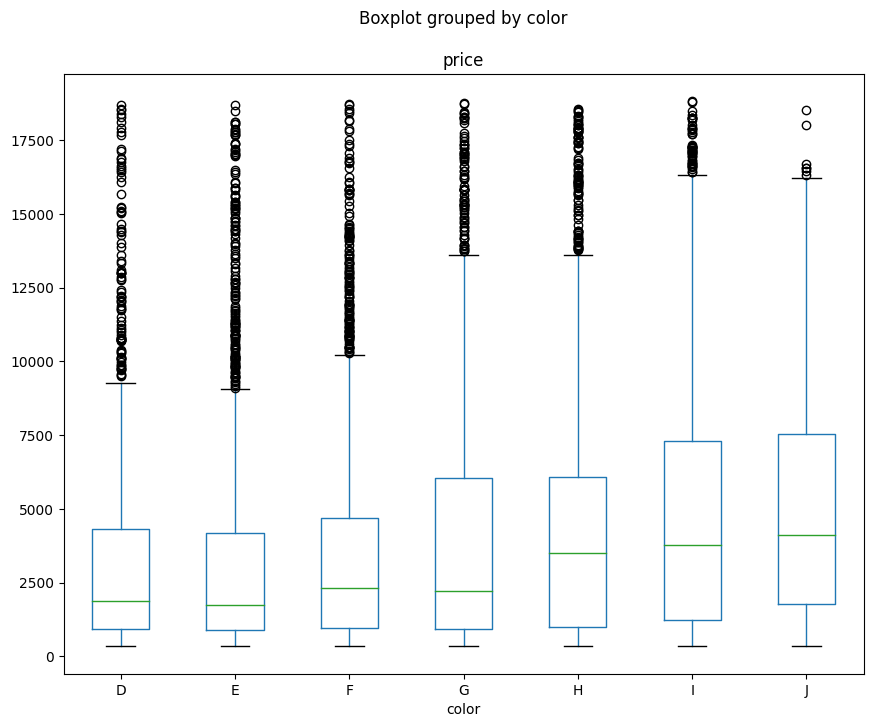

In [13]:
data.boxplot(by= 'color', column=['price'], grid= False, figsize= (10,8))

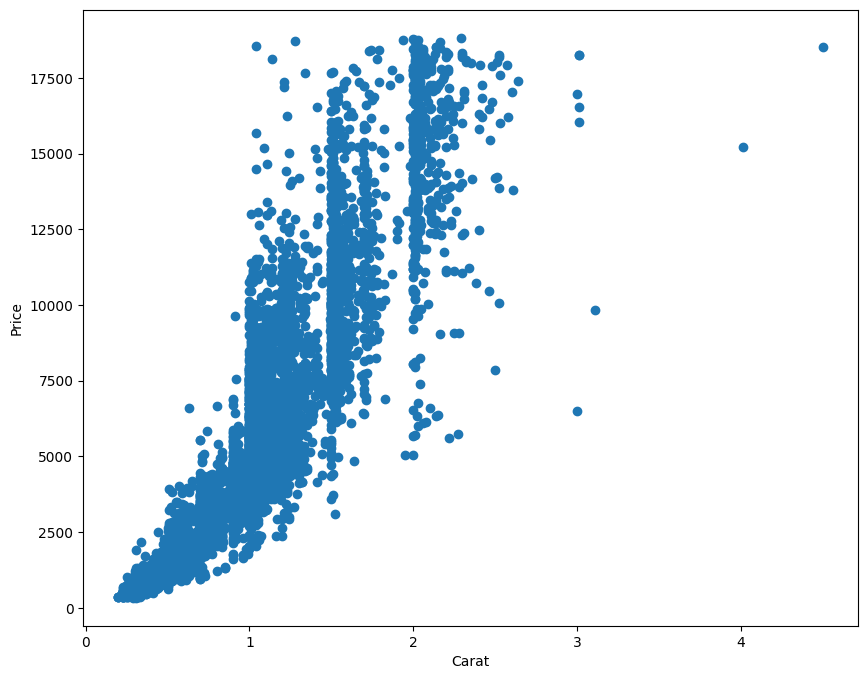

In [14]:
plt.subplots(figsize= (10,8))
plt.scatter(data['carat'],  data['price'])

plt.xlabel("Carat")
plt.ylabel("Price")

plt.show()

In [15]:
data['clarity'].unique()

array(['VVS2', 'SI1', 'SI2', 'VS1', 'VVS1', 'IF', 'VS2', 'I1'],
      dtype=object)

In [16]:
# converting ordinal data to numerical form

clarity_dict = {'IF':7,'VVS1':6,'VVS2':5,'VS1':4,'VS2':3,'SI1':2,'SI2':1,'I1':0}

data['clarity'].replace(clarity_dict, inplace= True)

data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.34,Ideal,E,5,62.3,57.0,1071,4.48,4.44,2.78
1,1.39,Premium,I,2,62.1,57.0,6694,7.22,7.08,4.44
2,1.20,Very Good,I,2,62.6,58.2,5280,6.71,6.74,4.21
3,0.56,Premium,G,1,60.0,60.0,1208,5.48,5.42,3.11
4,1.00,Premium,F,4,62.6,58.0,7114,6.37,6.40,4.00


In [17]:
# one hot encoding - suitable for categorical data that is either nominal or ordinal
data = pd.get_dummies(data, columns=['cut', 'color'])

data.head()

,carat,clarity,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J
0,0.34,5,62.3,57.0,1071,4.48,4.44,2.78,0,0,1,0,0,0,1,0,0,0,0,0
1,1.39,2,62.1,57.0,6694,7.22,7.08,4.44,0,0,0,1,0,0,0,0,0,0,1,0
2,1.20,2,62.6,58.2,5280,6.71,6.74,4.21,0,0,0,0,1,0,0,0,0,0,1,0
3,0.56,1,60.0,60.0,1208,5.48,5.42,3.11,0,0,0,1,0,0,0,0,1,0,0,0
4,1.00,4,62.6,58.0,7114,6.37,6.40,4.00,0,0,0,1,0,0,0,1,0,0,0,0


In [18]:
#creating a df with only the numeric features
NUMERIC_FEATURES =  ['carat','depth','table','x','y','z']
numeric_df = data[NUMERIC_FEATURES]
numeric_df.describe()

,carat,depth,table,x,y,z
count,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000,10788.000000
mean,0.800984,61.757508,57.443326,5.738205,5.744132,3.543557
std,0.475701,1.425686,2.183660,1.122458,1.226549,0.697289
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.720000,4.720000,2.920000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.530000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000
max,4.500000,73.600000,70.000000,10.230000,58.900000,8.060000


In [19]:
# standardizing the data - since the various numeric features have different scales
from sklearn.preprocessing import scale
numeric_array = scale(numeric_df)

numeric_array[:5]

array([[-0.96910718,  0.38053022, -0.20302909, -1.12098967, -1.06330241,
        -1.09508701],
       [ 1.23826584,  0.24024043, -0.20302909,  1.32019495,  1.08917722,
         1.28567183],
       [ 0.83883643,  0.59096492,  0.34653253,  0.86581387,  0.81196393,
         0.95580766],
       [-0.50660998, -1.23280245,  1.17087495, -0.23004638, -0.26427588,
        -0.62180363],
       [ 0.41838443,  0.59096492,  0.25493892,  0.56289315,  0.53475065,
         0.65462732]])

In [20]:
numeric_df = pd.DataFrame(numeric_array, columns= numeric_df.columns)
numeric_df.head()

,carat,depth,table,x,y,z
0,-0.969107,0.380530,-0.203029,-1.120990,-1.063302,-1.095087
1,1.238266,0.240240,-0.203029,1.320195,1.089177,1.285672
2,0.838836,0.590965,0.346533,0.865814,0.811964,0.955808
3,-0.506610,-1.232802,1.170875,-0.230046,-0.264276,-0.621804
4,0.418384,0.590965,0.254939,0.562893,0.534751,0.654627


In [21]:
# dropping the non-standardized features and replcing them with the standardized features
data.drop(NUMERIC_FEATURES, inplace= True, axis=1)
data = pd.concat([data,numeric_df], axis=1)

data.head()

,clarity,price,cut_Fair,cut_Good,cut_Ideal,cut_Premium,cut_Very Good,color_D,color_E,color_F,color_G,color_H,color_I,color_J,carat,depth,table,x,y,z
0,5,1071,0,0,1,0,0,0,1,0,0,0,0,0,-0.969107,0.380530,-0.203029,-1.120990,-1.063302,-1.095087
1,2,6694,0,0,0,1,0,0,0,0,0,0,1,0,1.238266,0.240240,-0.203029,1.320195,1.089177,1.285672
2,2,5280,0,0,0,0,1,0,0,0,0,0,1,0,0.838836,0.590965,0.346533,0.865814,0.811964,0.955808
3,1,1208,0,0,0,1,0,0,0,0,1,0,0,0,-0.506610,-1.232802,1.170875,-0.230046,-0.264276,-0.621804
4,4,7114,0,0,0,1,0,0,0,1,0,0,0,0,0.418384,0.590965,0.254939,0.562893,0.534751,0.654627


In [22]:
data.to_csv('datasets/diamonds_processed.csv', index= False)

In [23]:
# preprocessing is complete, on to linear regression
from sklearn.model_selection import train_test_split

X = data.drop('price', axis= 1)
Y = data['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size= 0.2, random_state= 0)

In [24]:
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
linear_regression.fit(x_train, y_train)

LinearRegression()

In [29]:
y_pred = linear_regression.predict(x_test)
y_pred



array([  156.5,   385. ,   596.5, ...,  1446. , 13881.5,  -182.5])

In [30]:
train_score = linear_regression.score(x_train, y_train)

train_score

0.9146176961779723

In [33]:
from sklearn.metrics import r2_score

score = r2_score(y_test, y_pred)

score

0.900830781066684